#**Árbol de Decisión para Clasificar Género según Características Faciales**

Para empezar importamos las librerías que necesitaremos para el desarrollo del proyecto.

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.metrics import confusion_matrix

Cargamos la base de datos

In [26]:
genero = pd.read_csv('/content/gender_classification_v7.csv')

Visualizamos los registros

In [27]:
genero.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


Antes de avanzar es importante describir las variables del DataFrame

*   **Long_hair** = Toma el valor de 1 si el individuo tiene una el cabello largo y 0 si su cabello es corto.
*   **Forehead_width_cm** =  Muestra el ancho de la frente en centímetros.
*   **Forehad_height_cm** = Muestra el alto de la frente en centímetros.
*   **Nose_wide** = La columna adopta valores de 0's y y 1's donde 0 corresponde a una nariz estrecha y 1 a una nariz ancha.
*   **Nose_long** =  La columna adopta valores de 0's y y 1's donde 0 corresponde a una nariz corta y 1 a una nariz larga.
*   **Lips_thin** = La columna adopta valores de 0's y y 1's donde 0 corresponde a unos labios anchos y 1 a unos labios delgados.
*   **Distance_nose_to_lip_long** = Esta columna contiene 0's y 1's donde 1 representa una distancia larga entre la nariz y los labios, mientras 0 es una distancia corta entre nariz y labios. 
*   **Gender** = Entre mujer o hombre.







Verificamos que no existan datos nulos.

In [18]:
genero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 312.7 KB


Observamos las estadísticas descriptivas del DataFrame

In [22]:
genero.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.00000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900,0.50010
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049,0.50005
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000,1.00000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000,1.00000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000,1.00000


Una proporción significativa de las variables son dummy y su análisis no es muy representativo. El análisis de las variables números permite conocer que en la variable ```forehead_width_cm``` el ancho promedio de la frente de los individuos es 13.18, la dispersión en las medidas es de 1.10, lo que no es significativamente muy alto, la medida más pequeña es de 11.40 y la más grande es de 15.50. Por su parte, la variable ```forehead_height_cm``` presenta una media en la altura de la frente de las personas de 5.94 cm. La dispersión de los datos es baja ya que su valor es de 0.54. La altura mínima es 5.1 y la máxima es de 7.1.



Tomaremos la variable ```Gender``` como variable dependiente, por lo tanto es importante observar si los datos están balanceados por medio de un histograma.
 


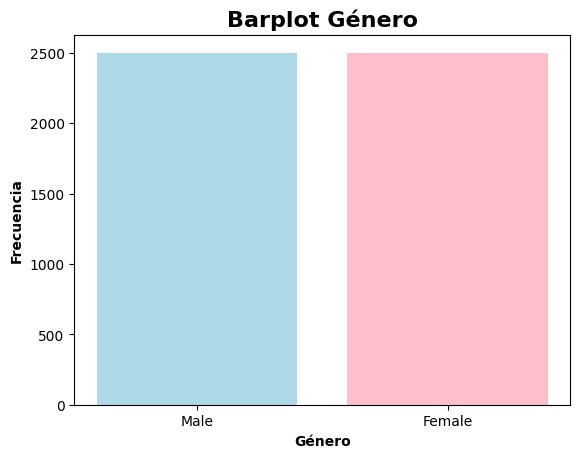

<Figure size 300x300 with 0 Axes>

In [44]:
plt.bar(genero['gender'], color=['lightblue','pink'],height = 2500 )
plt.title('Barplot Género', fontsize = 16, weight = 'bold')
plt.xlabel('Género', weight ='bold')
plt.ylabel('Frecuencia', weight = 'bold')
plt.figure(figsize =(3,3))
plt.show()

In [43]:
genero['gender'].value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

Notamos que los registros de mujeres y hombres son casi los mismos.

Reemplazamos los valores de la variable `Gender` asignando 0 a Male y 1 a Female





In [6]:
genero['gender'] = genero['gender'].replace(['Female','Male'],[1,0])

In [7]:
genero.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1


Separamos las variables predictores (X) de la variable predicha (y)

In [8]:
X = genero.drop(columns='gender')
y = genero['gender']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75, random_state=0)

Se selecciona la profundidad del árbol

In [10]:
arbol_clf = DecisionTreeClassifier(max_depth=4)
#Creamos el árbol
arbol_genero = arbol_clf.fit(X_train, y_train)
Y_pred = arbol_genero.predict(X_test)

Visualizamos el árbol

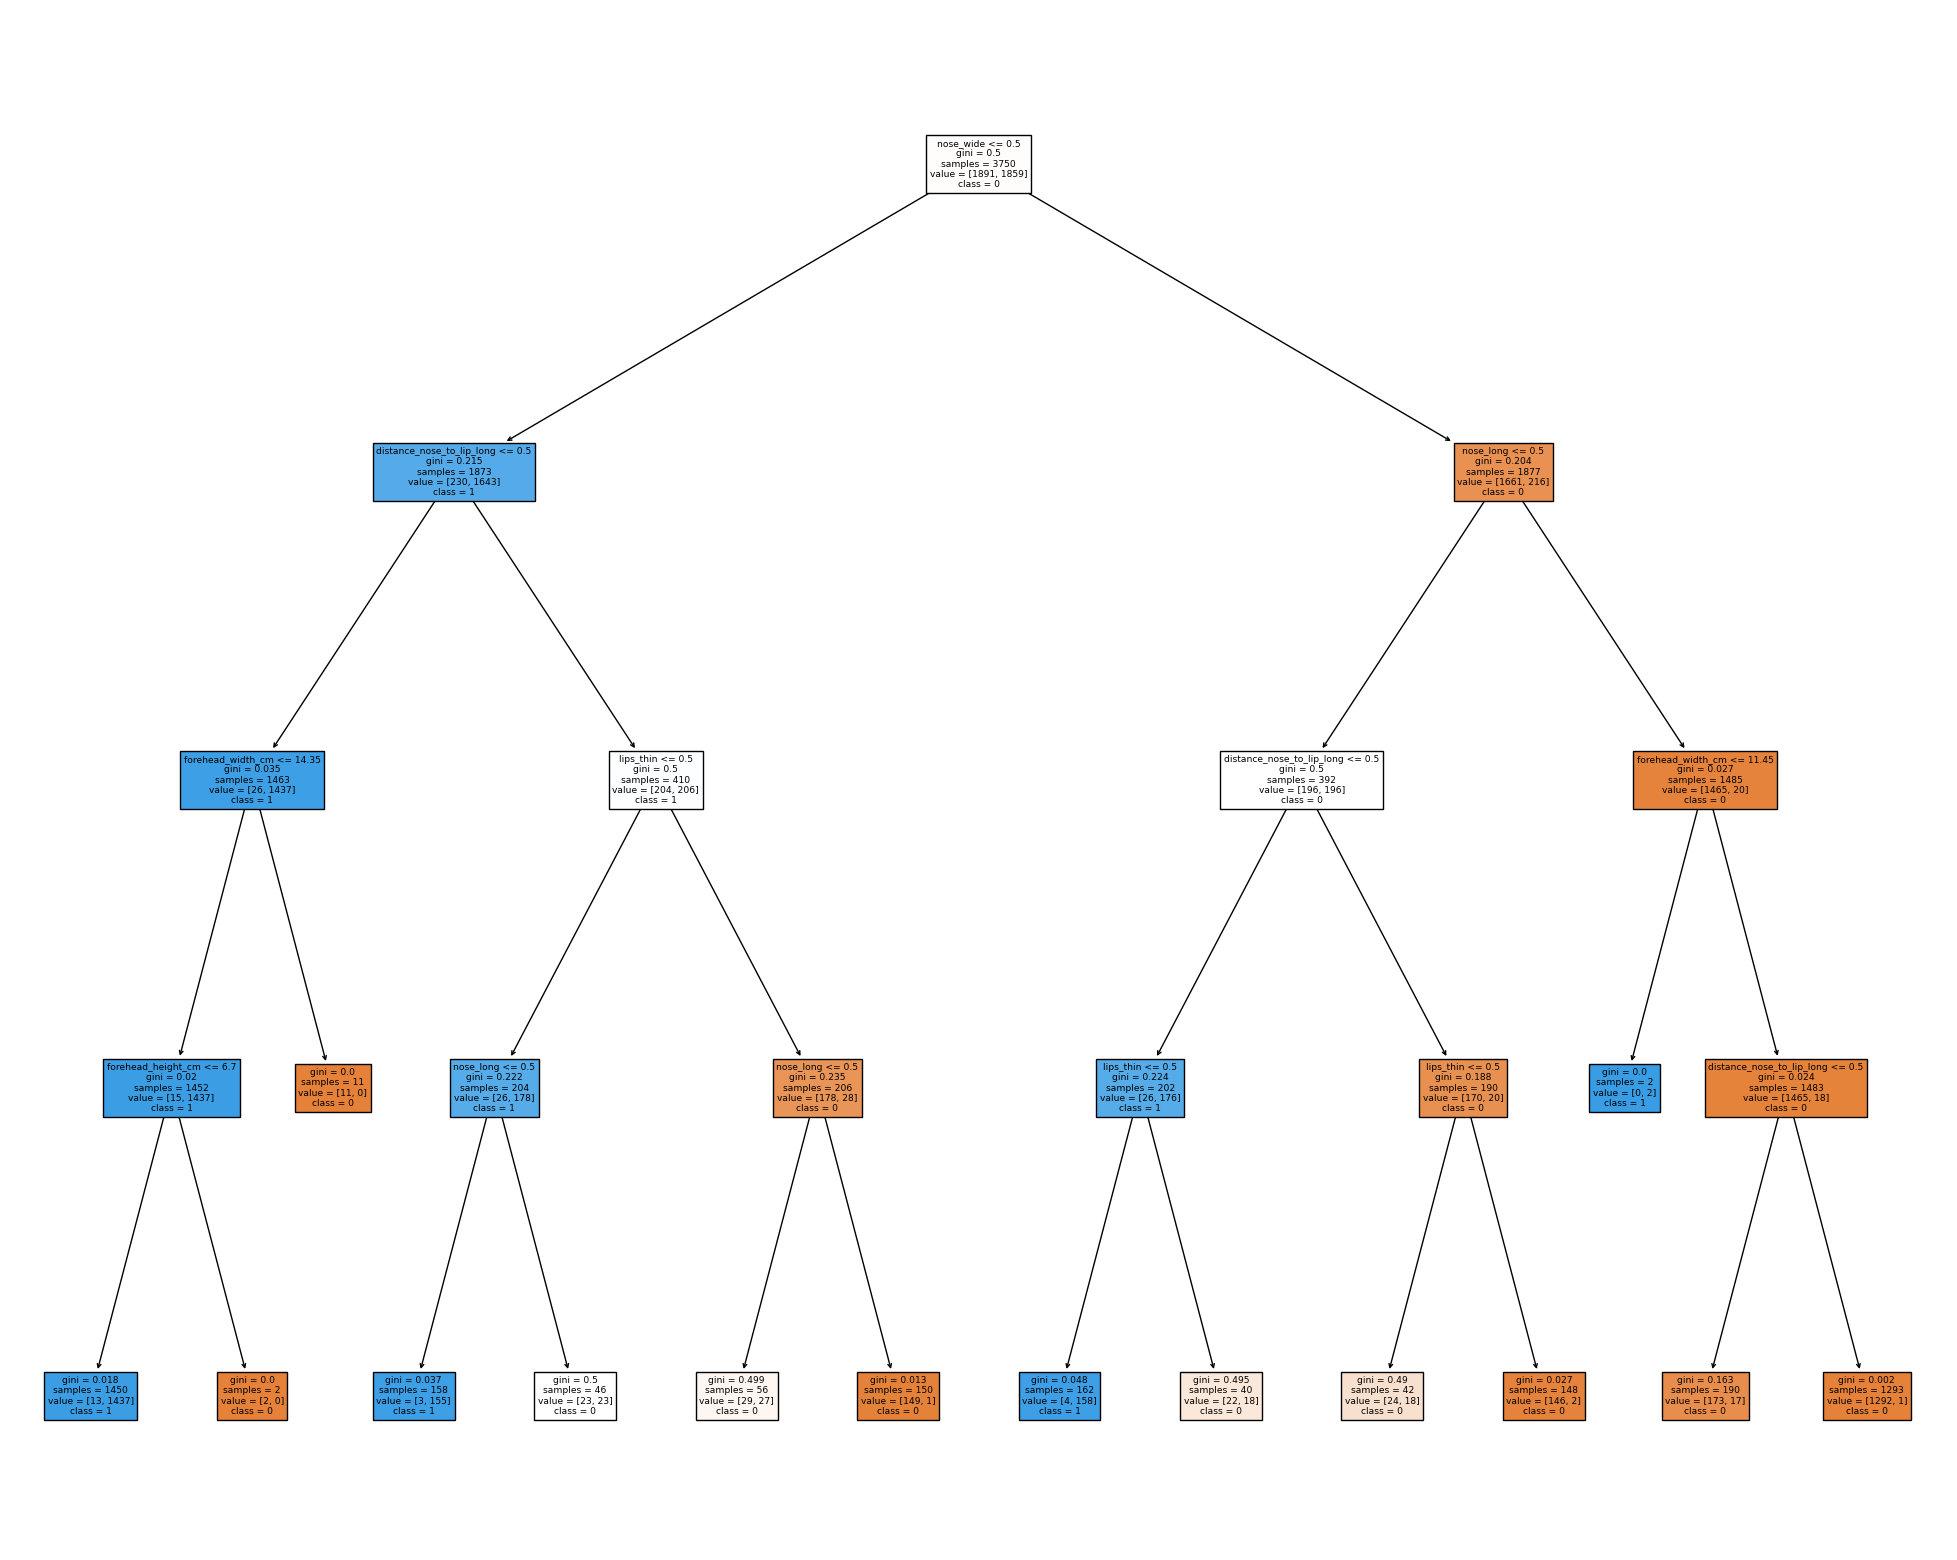

In [11]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(arbol_genero, feature_names= list(X.columns.values), class_names=[str(i) for i in y.values], filled= True)
plt.show()

En el árbol podemos observar que la variable que toma mayor relevancia para la clasificación de género es el ancho de la nariz. Es importante destacar que todas las flechas del lado izquierdo pertenecen a la respuesta "Verdadera" o al cumplimiento de la condición, mientras que las flechas del lado izquierdo pertenecen a la respuesta "Falso" o al NO cumplimiento de la condición.
El árbol está en 4 niveles, por la asignación que hicimos previamente. También es importante destacar que a medida que se llega a niveles más altos en los nodos, estos son más puros. 

Construimos la **Matriz de Confusión**

In [12]:
Matriz =  confusion_matrix(y_test, Y_pred)
Matriz

array([[597,  12],
       [ 41, 601]])

Visualizamos la matriz

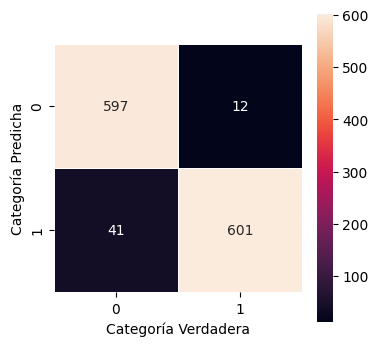

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (4,4))
sns.heatmap(Matriz, annot = True,fmt=".0f", square = True, linewidths=0.5)
plt.ylabel('Categoría Predicha')
plt.xlabel('Categoría Verdadera')
plt.show()

A simple vista observamos que el árbol presenta altos niveles de clasificación adecuada.

In [14]:
Precision_Global =  np.sum(Matriz.diagonal())/np.sum(Matriz)
Precision_Global

0.9576338928856915

La clasificación dado por el árbol tiene una precisión global del 0.95

Calculamos los niveles de presión para el NO.

In [15]:
Precision_no = ((Matriz[0,0]))/sum(Matriz[0,])
Precision_no

0.9802955665024631

In [16]:
Precision_Si = ((Matriz[ 0,1]))/sum(Matriz[ 1,])
Precision_Si

0.018691588785046728